In [1]:
import  pandas as pd

In [2]:
df = pd.read_csv("3200476.csv", index_col="DATE") #Reading csv file 

#df.drop(df.index[:20],inplace=True)
df = df[df['STATION'] != 'IN009010100'] #selecting the required station from 2 stations
df #display csv file

,STATION,PRCP,TAVG,TMAX,TMIN
DATE,,,,,
2008-07-30,IN009012800,NaN,70,81.0,68.0
2008-08-01,IN009012800,NaN,74,83.0,68.0
2008-08-02,IN009012800,NaN,74,NaN,68.0
2008-08-03,IN009012800,NaN,71,77.0,68.0
2008-08-04,IN009012800,NaN,72,76.0,NaN
...,...,...,...,...,...
2022-12-27,IN009012800,0.08,71,78.0,NaN
2022-12-28,IN009012800,0.00,72,82.0,NaN
2022-12-29,IN009012800,NaN,71,82.0,NaN


In [3]:
df.apply(pd.isnull).sum()/df.shape[0] # % of null values

STATION    0.000000
PRCP       0.717334
TAVG       0.000000
TMAX       0.062961
TMIN       0.128030
dtype: float64

In [4]:
df[pd.isnull(df["PRCP"])] # Null values of Precipitation

,STATION,PRCP,TAVG,TMAX,TMIN
DATE,,,,,
2008-07-30,IN009012800,NaN,70,81.0,68.0
2008-08-01,IN009012800,NaN,74,83.0,68.0
2008-08-02,IN009012800,NaN,74,NaN,68.0
2008-08-03,IN009012800,NaN,71,77.0,68.0
2008-08-04,IN009012800,NaN,72,76.0,NaN
...,...,...,...,...,...
2022-12-24,IN009012800,NaN,70,NaN,NaN
2022-12-25,IN009012800,NaN,69,76.0,NaN
2022-12-29,IN009012800,NaN,71,82.0,NaN


In [5]:
df["PRCP"].value_counts() #counts the no of values.

PRCP
0.00    419
0.01     65
0.02     47
0.04     31
0.03     24
       ... 
1.28      1
1.08      1
1.39      1
0.57      1
1.38      1
Name: count, Length: 153, dtype: int64

In [6]:
df["PRCP"]=df["PRCP"].fillna(0) #fills nan values with zero

In [7]:
df[pd.isnull(df["TMAX"])] # NAN values of TMAX

,STATION,PRCP,TAVG,TMAX,TMIN
DATE,,,,,
2008-08-02,IN009012800,0.00,74,NaN,68.0
2011-01-19,IN009012800,0.00,64,NaN,53.0
2011-01-23,IN009012800,0.00,66,NaN,NaN
2011-01-24,IN009012800,0.00,65,NaN,52.0
2011-01-26,IN009012800,0.00,62,NaN,57.0
...,...,...,...,...,...
2022-12-03,IN009012800,0.00,74,NaN,63.0
2022-12-15,IN009012800,0.01,70,NaN,NaN
2022-12-23,IN009012800,0.00,70,NaN,NaN


In [8]:
df[pd.isnull(df["TMIN"])] # NAN values of TMIN

,STATION,PRCP,TAVG,TMAX,TMIN
DATE,,,,,
2008-08-04,IN009012800,0.00,72,76.0,NaN
2008-08-05,IN009012800,0.00,74,83.0,NaN
2011-01-21,IN009012800,0.00,69,83.0,NaN
2011-01-22,IN009012800,0.00,69,81.0,NaN
2011-01-23,IN009012800,0.00,66,NaN,NaN
...,...,...,...,...,...
2022-12-27,IN009012800,0.08,71,78.0,NaN
2022-12-28,IN009012800,0.00,72,82.0,NaN
2022-12-29,IN009012800,0.00,71,82.0,NaN


In [9]:
df = df.fillna(method="ffill") # Filling NAN values with FOrward fill method.

In [10]:
df.index = pd.to_datetime(df.index) #Displaying date
df.index

DatetimeIndex(['2008-07-30', '2008-08-01', '2008-08-02', '2008-08-03',
               '2008-08-04', '2008-08-05', '2008-08-06', '2011-01-18',
               '2011-01-19', '2011-01-20',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', name='DATE', length=3796, freq=None)

In [11]:
df.index.month 

Index([ 7,  8,  8,  8,  8,  8,  8,  1,  1,  1,
       ...
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
      dtype='int32', name='DATE', length=3796)

In [12]:
df.apply(lambda x: (x==9999).sum()) # calculating the values that are 9999

STATION    0
PRCP       0
TAVG       0
TMAX       0
TMIN       0
dtype: int64

<Axes: xlabel='DATE'>

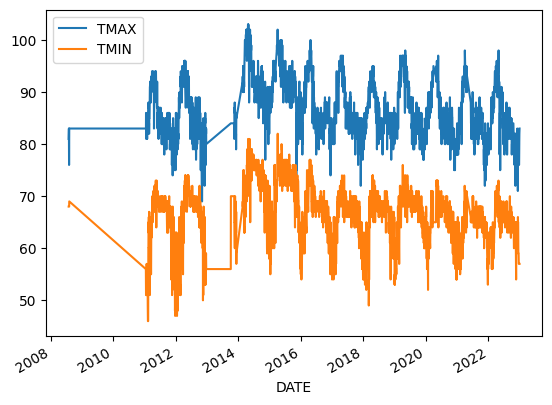

In [13]:
df[["TMAX","TMIN"]].plot() #plotting TMAX, TMIN 

In [14]:
df.index.year.value_counts().sort_index() # Values in every year.

DATE
2008      7
2011    337
2012    356
2013     34
2014    302
2015    337
2016    359
2017    359
2018    354
2019    360
2020    329
2021    317
2022    345
Name: count, dtype: int64

<Axes: xlabel='DATE'>

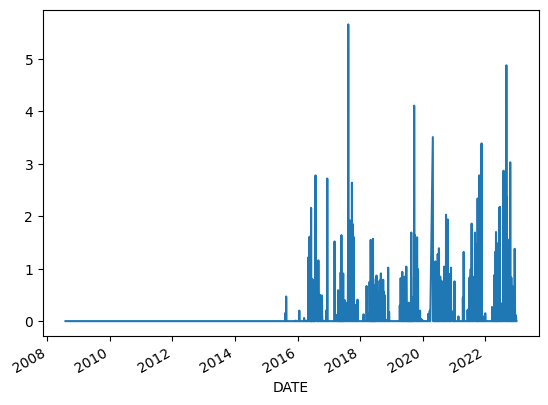

In [15]:
df["PRCP"].plot() # plotting the no of values everyyear

In [16]:
df.groupby(df.index.year).sum()["PRCP"] #sum of precipitation values everyyerar

DATE
2008     0.00
2011     0.00
2012     0.00
2013     0.00
2014     0.00
2015     0.64
2016    27.35
2017    50.63
2018    25.68
2019    33.83
2020    36.46
2021    42.88
2022    58.86
Name: PRCP, dtype: float64

In [17]:
df["target"]=df.shift(-1)["TAVG"] #create new column of target with TAVG removing 1st value.

In [18]:
df

,STATION,PRCP,TAVG,TMAX,TMIN,target
DATE,,,,,,
2008-07-30,IN009012800,0.00,70,81.0,68.0,74.0
2008-08-01,IN009012800,0.00,74,83.0,68.0,74.0
2008-08-02,IN009012800,0.00,74,83.0,68.0,71.0
2008-08-03,IN009012800,0.00,71,77.0,68.0,72.0
2008-08-04,IN009012800,0.00,72,76.0,68.0,74.0
...,...,...,...,...,...,...
2022-12-27,IN009012800,0.08,71,78.0,57.0,72.0
2022-12-28,IN009012800,0.00,72,82.0,57.0,71.0
2022-12-29,IN009012800,0.00,71,82.0,57.0,71.0


In [19]:
df=df.iloc[:-1,:].copy() # Removes last value in the column.
df

,STATION,PRCP,TAVG,TMAX,TMIN,target
DATE,,,,,,
2008-07-30,IN009012800,0.00,70,81.0,68.0,74.0
2008-08-01,IN009012800,0.00,74,83.0,68.0,74.0
2008-08-02,IN009012800,0.00,74,83.0,68.0,71.0
2008-08-03,IN009012800,0.00,71,77.0,68.0,72.0
2008-08-04,IN009012800,0.00,72,76.0,68.0,74.0
...,...,...,...,...,...,...
2022-12-26,IN009012800,0.11,71,78.0,57.0,71.0
2022-12-27,IN009012800,0.08,71,78.0,57.0,72.0
2022-12-28,IN009012800,0.00,72,82.0,57.0,71.0


In [20]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=.1) # Ridge regression algorithm.

In [21]:
pred  = ["PRCP","TMAX","TMIN","TAVG"] #selecting features from the data

In [22]:
train=df.loc[:"2020-12-31"] #training data 

In [23]:
test=df.loc["2021-01-01":]  #testing data

In [24]:
reg.fit(train[pred],train["target"]) # Fit the train - data 

Ridge(alpha=0.1)

In [25]:
predictions=reg.predict(test[pred])
predictions #Predicting the target.

array([68.19810945, 68.91313531, 70.98486095, 69.64271592, 70.98486095,
       70.44038718, 70.25447075, 71.95571496, 71.39097395, 71.13514582,
       70.98486095, 68.53921363, 70.42846309, 70.14402458, 69.94899813,
       69.86372209, 71.20015463, 68.84399049, 70.22930063, 70.85905045,
       74.0113805 , 74.35248468, 72.03685499, 71.50072436, 70.63541363,
       68.14923185, 71.13935295, 69.55901635, 72.13047418, 71.89491327,
       71.89491327, 71.33017227, 71.00933531, 70.31457668, 70.05874854,
       69.32345545, 70.42432708, 68.92926653, 70.35931826, 68.84399049,
       72.00466367, 74.49084545, 73.44663949, 73.21107859, 71.71601804,
       69.57848507, 71.72356266, 72.95938646, 74.07638931, 75.67699314,
       76.92814964, 77.72845155, 78.0492885 , 76.92814964, 76.92814964,
       75.97756286, 74.94170004, 73.90583722, 76.392019  , 78.02902127,
       77.0784345 , 75.00670886, 75.97756286, 77.57816668, 76.62757991,
       75.74200195, 77.34260577, 76.62757991, 78.76431437, 75.81

In [26]:
from sklearn.metrics import mean_absolute_error #Import mean_absolute_error

In [27]:
mean_absolute_error(test["target"],predictions ) #mean_absolute_error on test dataset

1.231797556300172

In [28]:
both=pd.concat([test["target"],pd.Series(predictions,index=test.index)], axis=1)

<Axes: xlabel='DATE'>

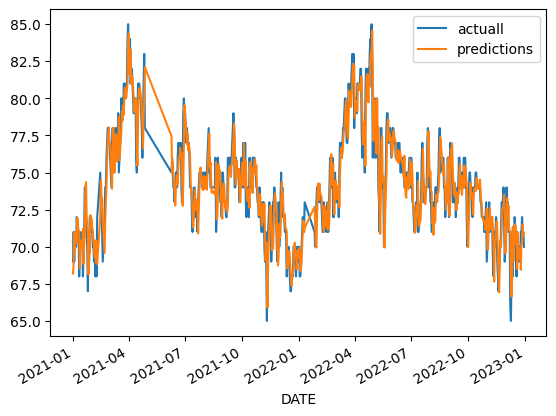

In [29]:
both.columns=["actuall","predictions"]
both.plot() #plotting the actual,prediction datasets.

In [30]:
reg.coef_  #print the coefficients.

array([0.26306492, 0.15028486, 0.08527605, 0.71502587])

In [31]:
def weather_prediction(pred,df,reg):
    train=df.loc[:"2020-12-31"]
    test=df.loc["2021-01-01":]
    reg.fit(train[pred],train["target"])
    predictions=reg.predict(test[pred])
    error=mean_absolute_error(test["target"],predictions )
    both=pd.concat([test["target"],pd.Series(predictions,index=test.index)], axis=1)
    both.columns=["actuall","predictions"]
    return error,both

In [32]:
df["month_max"]=df["TAVG"].rolling(30).mean()

In [33]:
df

,STATION,PRCP,TAVG,TMAX,TMIN,target,month_max
DATE,,,,,,,
2008-07-30,IN009012800,0.00,70,81.0,68.0,74.0,NaN
2008-08-01,IN009012800,0.00,74,83.0,68.0,74.0,NaN
2008-08-02,IN009012800,0.00,74,83.0,68.0,71.0,NaN
2008-08-03,IN009012800,0.00,71,77.0,68.0,72.0,NaN
2008-08-04,IN009012800,0.00,72,76.0,68.0,74.0,NaN
...,...,...,...,...,...,...,...
2022-12-26,IN009012800,0.11,71,78.0,57.0,71.0,70.400000
2022-12-27,IN009012800,0.08,71,78.0,57.0,72.0,70.333333
2022-12-28,IN009012800,0.00,72,82.0,57.0,71.0,70.266667
